<a href="https://colab.research.google.com/github/omarreess/DLI-Internship-Data-Science/blob/main/Assignment%207%20-%20KNN%20SVM%20LOG%20Assignment%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> <center> KNN , SVM & Logistic Reg Assignment

<h2> Importing

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix 
import seaborn as sns
from matplotlib import rcParams
from sklearn.metrics import precision_recall_fscore_support 
from sklearn.metrics import accuracy_score,classification_report,precision_recall_fscore_support,roc_auc_score,roc_curve,auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score




<h2> Importing Dataset

11501568/11490434 [==============================] - 0s 0us/step


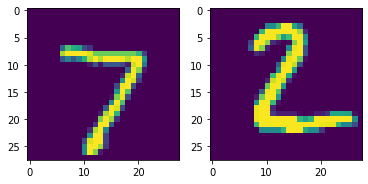

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# show sample of data
plt.subplot(1, 2, 1) 
plt.imshow(X_test[0]) 

plt.subplot(1, 2, 2) 
plt.imshow(X_test[1]) 
 
plt.show()


<h2> Reshaping Data

In [3]:
print(f"Data shape : {X_train.shape}  ")

# reshape 
X_train = X_train.reshape(X_train.shape[0] , -1)
X_test = X_test.reshape(X_test.shape[0] , -1)

print(f"New Data shape : {X_train.shape}")




Data shape : (60000, 28, 28)  
New Data shape : (60000, 784)


<h2> Data normalization

In [4]:

print(f'Its Max value : {X_train.max()}\nIts Min value:{X_train.min()}') 
X_train = X_train  / 255.0
X_test = X_test / 255.0
print(f'After normalization:\nIts Max value : {X_train.max()}\nIts Min value:{X_train.min()}')


Its Max value : 255
Its Min value:0
After normalization:
Its Max value : 1.0
Its Min value:0.0


<h2> Trainning Data


In [5]:
K_number = round(np.sqrt(X_train.shape[0]))  
Knn_classifier = KNeighborsClassifier(n_neighbors = K_number) 
Knn_classifier.fit(X_train, y_train)
Predicted_result= Knn_classifier.predict(X_test )
Predicted_result_proba = Knn_classifier.predict_proba(X_test )

print (f'Actual result : {y_test[0]} \nPredicted result :{Predicted_result[0]}\n')


Actual result : 7 
Predicted result :7



<h2> KNN Metric 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.82      1.00      0.90      1135
           2       0.99      0.84      0.91      1032
           3       0.93      0.94      0.94      1010
           4       0.96      0.90      0.93       982
           5       0.95      0.90      0.93       892
           6       0.95      0.97      0.96       958
           7       0.92      0.90      0.91      1028
           8       0.97      0.85      0.91       974
           9       0.87      0.94      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000



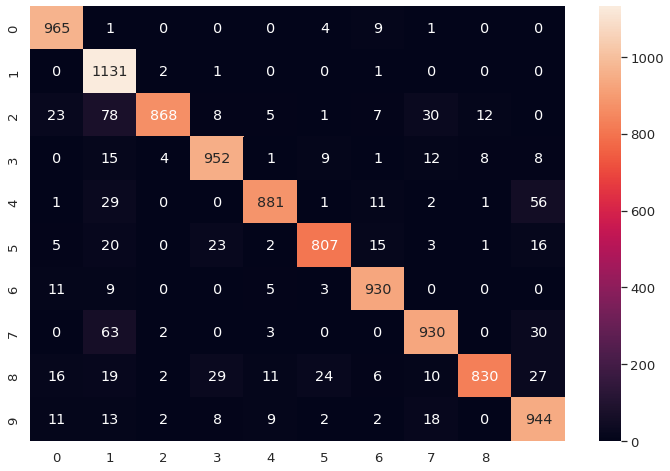

In [6]:
classes_num = range(y_train.min() , y_train.max())
cm = confusion_matrix(y_test, Predicted_result)

# C Matrix
rcParams['figure.figsize'] = 12,8
sns.set(font_scale = 1.2)
sns.heatmap(cm, fmt='d', annot=True, xticklabels=range(y_train.min() , y_train.max()))

# Report
print(classification_report(y_test,Predicted_result))




<H2> Calculate AUC , F1 Score with Average Methods

In [7]:
# Binarize data for getting AUC 
y_test_bin = label_binarize(y_test, classes=range(y_train.min() , y_train.max())) 
y_pred_bin = label_binarize(Predicted_result, classes=range(y_train.min() , y_train.max()))


In [8]:
# Calculate AUC ,F1 , Recall , Precision using Average Methods
# make a generic fucntion for it , as we will call it multiple times 

def get_classfier_metrics(y_test_params:list ,predicted_result_params :list, y_test_bin_params:list , predicted_result_bin_params:list ):
 average_methods = ['micro','macro','weighted']
 for method in average_methods:
  Precision,Recall,F1_score,_	= precision_recall_fscore_support(y_test_params, predicted_result_params, average=method)
  Accuracy = accuracy_score(y_test_params, predicted_result_params)
  auc_ovr = roc_auc_score(y_test_bin_params, predicted_result_bin_params, average=method, multi_class='ovr') 
  print(f'{method}:')
  print(f'Precision: {round(Precision*100,2)}%\nRecall: {round(Recall*100,2)}%\nF1 score: {round(F1_score*100,2)}% \nAUC OVR :{round(auc_ovr*100,2)}%\n')


get_classfier_metrics(y_test ,Predicted_result , y_test_bin ,y_pred_bin  )

micro:
Precision: 92.38%
Recall: 92.38%
F1 score: 92.38% 
AUC OVR :95.74%

macro:
Precision: 93.03%
Recall: 92.3%
F1 score: 92.44% 
AUC OVR :95.69%

weighted:
Precision: 92.85%
Recall: 92.38%
F1 score: 92.38% 
AUC OVR :95.72%



<H2> Plotting ROC Curve 

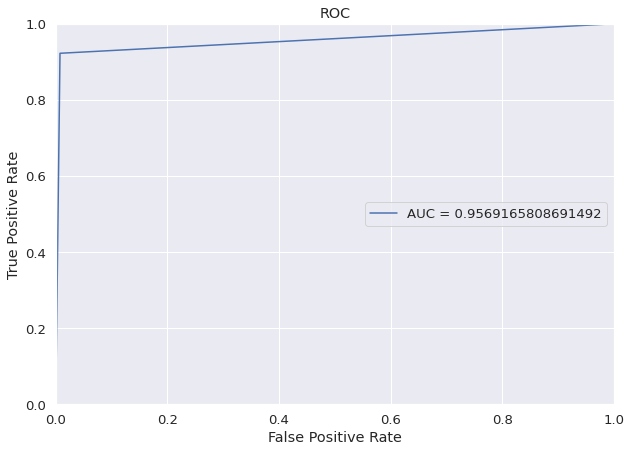

In [9]:
# Calculate FP , TP rate
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel()  )

# Get AUC , 
# using macro  as we observed it have best score
auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro', multi_class='ovr')
 
#Plot ROC curve
sns.set_style("darkgrid")
plt.figure(figsize=(10,7))

sns.lineplot(x=fpr,y=tpr , label= f"AUC = {auc}" ,palette="crest" )
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0]) 
plt.title('ROC')
plt.legend(loc=5)
plt.show()


<H2> Improving Our KNN Model

In [10]:
# Using Grid Search 
# with 4 iterations for k-cross validation  & K niegbhors from 1:11

param_grid = dict(n_neighbors=list(range(1, 11)))
grid_search_KNN = GridSearchCV( KNeighborsClassifier(algorithm='auto'), param_grid, cv=4, scoring='f1_macro')
grid_search_KNN.fit( X_train, y_train)

  

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='f1_macro')

In [11]:
print (f"Best F1 score for KNN : {round(100*grid_search_KNN.best_score_,2)}%  with K neighbors = {grid_search_KNN.best_params_['n_neighbors']}")


Best F1 score for KNN : 96.92%  with K neighbors = 3


<H2> Fitting Dataset with SVM Model 

In [12]:
 # Fitting data with SVM Model with different kernels
 # Fitting using SVMf
 
param_grid = { 'kernel': ['rbf', 'poly', 'sigmoid','linear']}
grid_search_SVC = GridSearchCV(SVC(),param_grid, cv = 4)
grid_search_SVC.fit( X_train, y_train)


GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [13]:
 print (f"Best F1 score for SVM : {round(100*grid_search_SVC.best_score_,2)}%  with Kernel : {grid_search_SVC.best_params_['kernel']}")



Best F1 score for SVM : 97.63%  with Kernel : rbf


<H2> Fitting Dataset with Logisitc Regression 

In [14]:
# Fitting using Logistic 
classifier_logistic = LogisticRegression() 
classifier_logistic.fit(X_train, y_train)
prediected_result_logistic = classifier_logistic.predict(X_test)



print('\nLogistic Reg Metric')
y_pred_bin_logistic = label_binarize(prediected_result_logistic, classes=range(y_train.min() , y_train.max()))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



Logistic Reg Metric


In [15]:
# Metric for Logisitc Reg 

get_classfier_metrics(y_test ,prediected_result_logistic , y_test_bin ,y_pred_bin_logistic  )
print (f'For Logistic Reg Actual result : {y_test[0]} \nPredicted result :{prediected_result_logistic[0]}\n')


micro:
Precision: 92.58%
Recall: 92.58%
F1 score: 92.58% 
AUC OVR :95.94%

macro:
Precision: 92.5%
Recall: 92.48%
F1 score: 92.48% 
AUC OVR :95.88%

weighted:
Precision: 92.57%
Recall: 92.58%
F1 score: 92.57% 
AUC OVR :95.94%

For Logistic Reg Actual result : 7 
Predicted result :7

